
Pour k = 10 :
 - MSE : 53.33
 - Gain de compression : 4.98


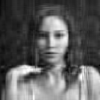


Pour k = 20 :
 - MSE : 22.98
 - Gain de compression : 2.49


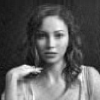


Pour k = 50 :
 - MSE : 1.87
 - Gain de compression : 1.00


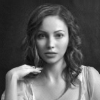


Pour k = 100 :
 - MSE : 0.62
 - Gain de compression : 0.50


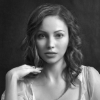


Pour k = 200 :
 - MSE : 0.62
 - Gain de compression : 0.25


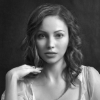


Image Originale :


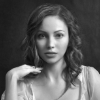

In [1]:
from PIL import Image
import numpy as np
from IPython.display import display
import os

# Charger l'image couleur et convertir en niveaux de gris
image_couleur = Image.open("image.jpg")
image_gris = image_couleur.convert("L")
matrice_A = np.array(image_gris)

# Appliquer la décomposition SVD
U, S, VT = np.linalg.svd(matrice_A, full_matrices=False)

# Dimensions de l'image
m, n = matrice_A.shape

# Fonction pour calculer le MSE
def calculer_mse(A_original, A_reconstituee):
    return np.mean((A_original - A_reconstituee) ** 2)

# Calculer le gain de compression
def gain_compression(k, original_size, m, n):
    compressed_size = k * (1 + m + n)
    return original_size / compressed_size

# Taille totale des données originales
taille_originale = m * n

# Répertoire pour stocker les images compressées (au même niveau que le code source)
output_dir = os.path.join(os.getcwd(), "images_comprimeesGris")

# Créer le répertoire s'il n'existe pas
os.makedirs(output_dir, exist_ok=True)

# Liste des valeurs de k à tester
valeurs_k = [10, 20, 50, 100, 200]

# Comparer visuellement les images et calculer MSE et gain de compression
for k in valeurs_k:
    # Garder uniquement les k premières valeurs singulières
    S_k = np.diag(S[:k])
    
    # Reconstituer l'image compressée
    A_k = np.dot(U[:, :k], np.dot(S_k, VT[:k, :]))
    A_k = np.clip(A_k, 0, 255).astype(np.uint8)
    
    # Calculer le MSE
    mse = calculer_mse(matrice_A, A_k)
    
    # Calculer le gain de compression
    compression_gain = gain_compression(k, taille_originale, m, n)
    
    # Convertir la matrice en image
    image_comprimee = Image.fromarray(A_k)
    
    # Sauvegarder l'image compressée dans le dossier
    image_comprimee.save(os.path.join(output_dir, f"image_comprimee_k_{k}.png"))
    
    # Afficher les résultats
    print(f"\nPour k = {k} :")
    print(f" - MSE : {mse:.2f}")
    print(f" - Gain de compression : {compression_gain:.2f}")
    
    # Afficher l'image compressée
    display(image_comprimee)

# Afficher l'image originale pour comparaison
print("\nImage Originale :")
display(image_gris)
